In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# import of the linear regression model
from sklearn.linear_model import LinearRegression
# import of our evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
# import necessary library  
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')
RSEED = 42

In [2]:
from sklearn.tree import DecisionTreeRegressor

# Make a decision tree and train
tree = DecisionTreeRegressor(random_state=RSEED)
#tree.fit(X, y)

In [3]:
#loading csv file
df = pd.read_csv('data/Train.csv')

In [4]:
#create a new data frame for data cleaning
df_clean = df

In [5]:
#create a new column to find out how many people belong to one observation

df_clean['total_visitors']=df_clean['total_female']+df_clean['total_male'] 
df_clean.head(10) 
#df_clean = df.drop(['total_female', 'total_male'], axis=1)


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_visitors
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0
5,tour_1005,UNITED KINGDOM,25-44,NaN,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0,1.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0,1.0
7,tour_1008,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,10.0,3.0,Cash,Yes,Friendly People,3480750.0,2.0
8,tour_101,NIGERIA,25-44,Alone,0.0,1.0,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,...,No,No,No,4.0,0.0,Cash,Yes,NaN,994500.0,1.0
9,tour_1011,INDIA,25-44,Alone,1.0,0.0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,5.0,0.0,Credit Card,Yes,Friendly People,2486250.0,1.0


In [6]:
#create a list of all the columns which are with categories "yes" and "no" and replace it with 0 and 1
column_list = ['package_transport_int','package_accomodation','package_food', 'package_sightseeing','package_guided_tour', 'package_insurance', 'first_trip_tz', 'package_transport_tz']
df_clean[column_list] = df_clean[column_list].replace('Yes', 1)
df_clean[column_list] = df_clean[column_list].replace('No', 0)
df_clean.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_visitors
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0,1.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0,2.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0,1.0


In [7]:
df_clean[['travel_with','most_impressing']] = df_clean[['travel_with','most_impressing']].fillna('Not_mentioned')
df_clean.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_visitors
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,Not_mentioned,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0,1.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0,2.0
4,tour_1004,CHINA,1-24,Not_mentioned,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0,1.0


In [8]:
#Change the columns (object) into categorical

category_list = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'payment_mode', 'most_impressing', 'country']

df_clean[category_list]= df_clean[category_list].astype('category')

df_clean.dtypes

ID                         object
country                  category
age_group                category
travel_with              category
total_female              float64
total_male                float64
purpose                  category
main_activity            category
info_source              category
tour_arrangement         category
package_transport_int       int64
package_accomodation        int64
package_food                int64
package_transport_tz        int64
package_sightseeing         int64
package_guided_tour         int64
package_insurance           int64
night_mainland            float64
night_zanzibar            float64
payment_mode             category
first_trip_tz               int64
most_impressing          category
total_cost                float64
total_visitors            float64
dtype: object

In [9]:
#drop cost per person because of correlation with total cost
df_clean = df_clean.drop(['country', 'ID', 'total_visitors'], axis=1)

In [10]:
df_clean['total_male'] = df_clean['total_male'].fillna(0)
df_clean['total_female'] = df_clean['total_female'].fillna(0)

In [11]:
#creating dummies for categorical variable
df_clean = pd.get_dummies(df_clean, drop_first=True, dtype=float)
df_clean.head(10)

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,...,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Not_mentioned,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1.0,1.0,0,0,0,0,0,0,0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0,0,0,0,0,0,0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0,0,0,0,0,0,0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0,1,1,1,1,1,0,11.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0,0,0,0,0,0,0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0,0,0,0,1,1,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0,0,0,0,0,0,0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1,1,1,1,1,1,1,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0,0,0,0,0,0,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0,0,0,0,0,0,0,5.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Converting the TZS to US Dollars

exchange_rate =  0.00041
df_clean['total_cost_usd'] = (df_clean['total_cost']* exchange_rate).round(2)

In [13]:
df_clean = df_clean.drop('total_cost', axis=1)

In [14]:
df_clean.isna().sum()

total_female                                            0
total_male                                              0
package_transport_int                                   0
package_accomodation                                    0
package_food                                            0
package_transport_tz                                    0
package_sightseeing                                     0
package_guided_tour                                     0
package_insurance                                       0
night_mainland                                          0
night_zanzibar                                          0
first_trip_tz                                           0
age_group_25-44                                         0
age_group_45-64                                         0
age_group_65+                                           0
travel_with_Children                                    0
travel_with_Friends/Relatives                           0
travel_with_No

In [15]:
df_clean.columns

Index(['total_female', 'total_male', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'night_mainland', 'night_zanzibar', 'first_trip_tz', 'age_group_25-44',
       'age_group_45-64', 'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Not_mentioned',
       'travel_with_Spouse', 'travel_with_Spouse and Children',
       'purpose_Leisure and Holidays', 'purpose_Meetings and Conference',
       'purpose_Other', 'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
  

In [16]:
# Extract the labels
#labels = np.array(df_clean.pop('total_cost_usd'))

# 30% examples in test data
#train, test, train_labels, test_labels = train_test_split(df_clean, labels,
                                                          #stratify = labels,
 #                                                         test_size = 0.3, 
 #                                                         random_state = RSEED)

In [17]:
# Train tree
#tree.fit(train, train_labels)
#print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

In [18]:
#y_1 = tree.predict(test)


In [19]:
#score = tree.score(train, train_labels)
#print("R-squared:", score) 
 


In [20]:
#ypred = tree.predict(test)

#mse = mean_squared_error(train_labels, ypred)
#print("MSE: ", mse)
#print("RMSE: ", mse**(1/2.0)) 

In [21]:
#df_clean
X = df_clean.drop('total_cost_usd', axis=1)

y = df_clean['total_cost_usd']  

In [22]:
X.shape

(4809, 52)

In [48]:
# Log-transform skewed features using np.log()
y = y.apply(lambda x: np.log(x))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

In [50]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = RSEED) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [51]:
#print predictions
print(predictions)

[1.94469101 1.74448685 2.09567248 ... 2.03508055 1.31199423 1.76273013]


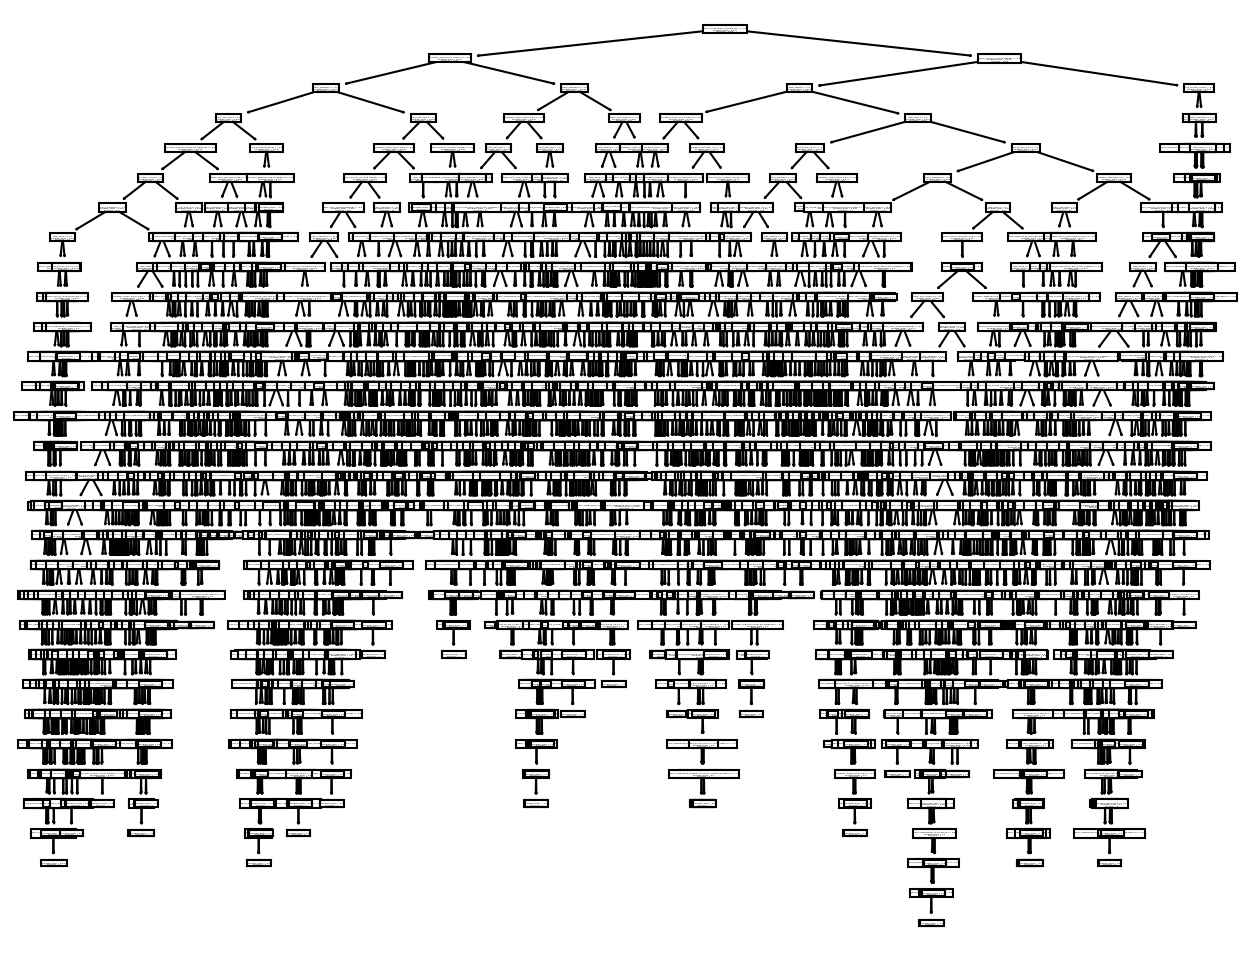

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8), dpi=150)
plot_tree(regressor, feature_names=X.columns);

In [53]:
#training accuracy
y_pred_train = regressor.predict(X_train)
r2_score(y_train, y_pred_train)

0.991300774804567

In [54]:
#testing accuracy
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

-0.16285661673666008

In [68]:
# Calculate metric
def calculate_metrics(y_train, y_pred_train, y_test, y_pred_test):
    """Calculate and print out RMSE and R2 for train and test data
    Args:
        y_train (array): true values of y_train
        y_pred_train (array): predicted values of model for y_train
        y_test (array): true values of y_test
        y_pred_test (array): predicted values of model for y_test
    """

    print("Metrics on training data") 
    rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
    r2 = r2_score(y_train,y_pred_train)
    print("RMSE:", round(rmse_train, 3))
    print("RMSE Antilog", np.exp(rmse_train) )
    print("R2:", round(r2, 3))
    print("Mean of the y train set", (y_train.mean()))
    print("Antilog of the mean of the y train set", (np.exp(y_train.mean())))
    print("Mean absolute error", mean_absolute_error(y_train, y_pred_train))
    print("Mean absolute error antilog", np.exp(mean_absolute_error(y_train, y_pred_train)) )
    print("---"*10)
    
    # Calculate metric
    print("Metrics on test data")  
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    # you can get the same result with this line:
    # rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))

    r2 = r2_score(y_test,y_pred_test)
    print("RMSE:", round(rmse_test, 3))
    print("RMSE Antilog", np.exp(rmse_test))
    print("R2:", round(r2, 3))
    print("Mean of the y test set", (y_test.mean()))
    print("Antilog of the mean of the y test set", (np.exp(y_test.mean())))
    print("Mean absolute error", mean_absolute_error(y_test, y_pred_test))
    print("Mean absolute error antilog", np.exp(mean_absolute_error(y_test, y_pred_test)) )
    print("---"*10)

In [69]:
print("Decision Tree:")
print("---"*10)
calculate_metrics(y_train, y_pred_train, y_test, y_pred)

Decision Tree:
------------------------------
Metrics on training data
RMSE: 0.025
RMSE Antilog 1.0253015454376124
R2: 0.991
Mean of the y train set 1.9174197176193954
Antilog of the mean of the y train set 6.803381157300086
Mean absolute error 0.0033678880852138385
Mean absolute error antilog 1.0033735657924627
------------------------------
Metrics on test data
RMSE: 0.278
RMSE Antilog 1.3211314287901905
R2: -0.163
Mean of the y test set 1.916780552166782
Antilog of the mean of the y test set 6.799034060508417
Mean absolute error 0.20159543365512422
Mean absolute error antilog 1.2233529805385328
------------------------------


#### GridSearchCV & Cross Validation in Decision Tree Regression

First, we create a param grid with multiple hyperparameters and their possible values, which we will use to create and evaluate the model. We then use this param grid and the DecisionTreeRegressor object to create a GridSearchCV instance with K Cross Validation value cv=10 and R2 scoring technique.

Finally, the GridSearchCV object was fitted to the training dataset. GridSearchCV creates models with all possible combinations of hyperparameters that we specified in param grid during this process.

In [ ]:
# cross validation
param_grid = {
    'max_depth': [80, 90, 100, None],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 3, 4],
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ["best", "random"]
}

rf = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose =2, scoring='neg_root_mean_squared_error',  n_jobs = -1)
grid_search.fit(X_train, y_train)

In [58]:
#checking for best hyperparameters 
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [59]:
best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [60]:
#training accuracy
y_pred_tr = best_grid.predict(X_train)
r2_score(y_train, y_pred_tr)

0.49817142480757803

In [66]:
rf2 = DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth= 100,
 max_features= 'log2',
 min_samples_leaf= 5,
 min_samples_split= 2,
 splitter= 'best').fit(X_train, y_train)

In [61]:
#testing accuracy
y_pred_te = best_grid.predict(X_test)
r2_score(y_test, y_pred_te)

0.38054598673085516

In [70]:
print("Decision Tree:")
print("---"*10)
calculate_metrics(y_train, y_pred_tr, y_test, y_pred_te)

Decision Tree:
------------------------------
Metrics on training data
RMSE: 0.19
RMSE Antilog 1.2089819595094728
R2: 0.498
Mean of the y train set 1.9174197176193954
Antilog of the mean of the y train set 6.803381157300086
Mean absolute error 0.13954994611202468
Mean absolute error antilog 1.1497562301374589
------------------------------
Metrics on test data
RMSE: 0.203
RMSE Antilog 1.225389202154026
R2: 0.381
Mean of the y test set 1.916780552166782
Antilog of the mean of the y test set 6.799034060508417
Mean absolute error 0.14879671028438926
Mean absolute error antilog 1.1604370603089642
------------------------------


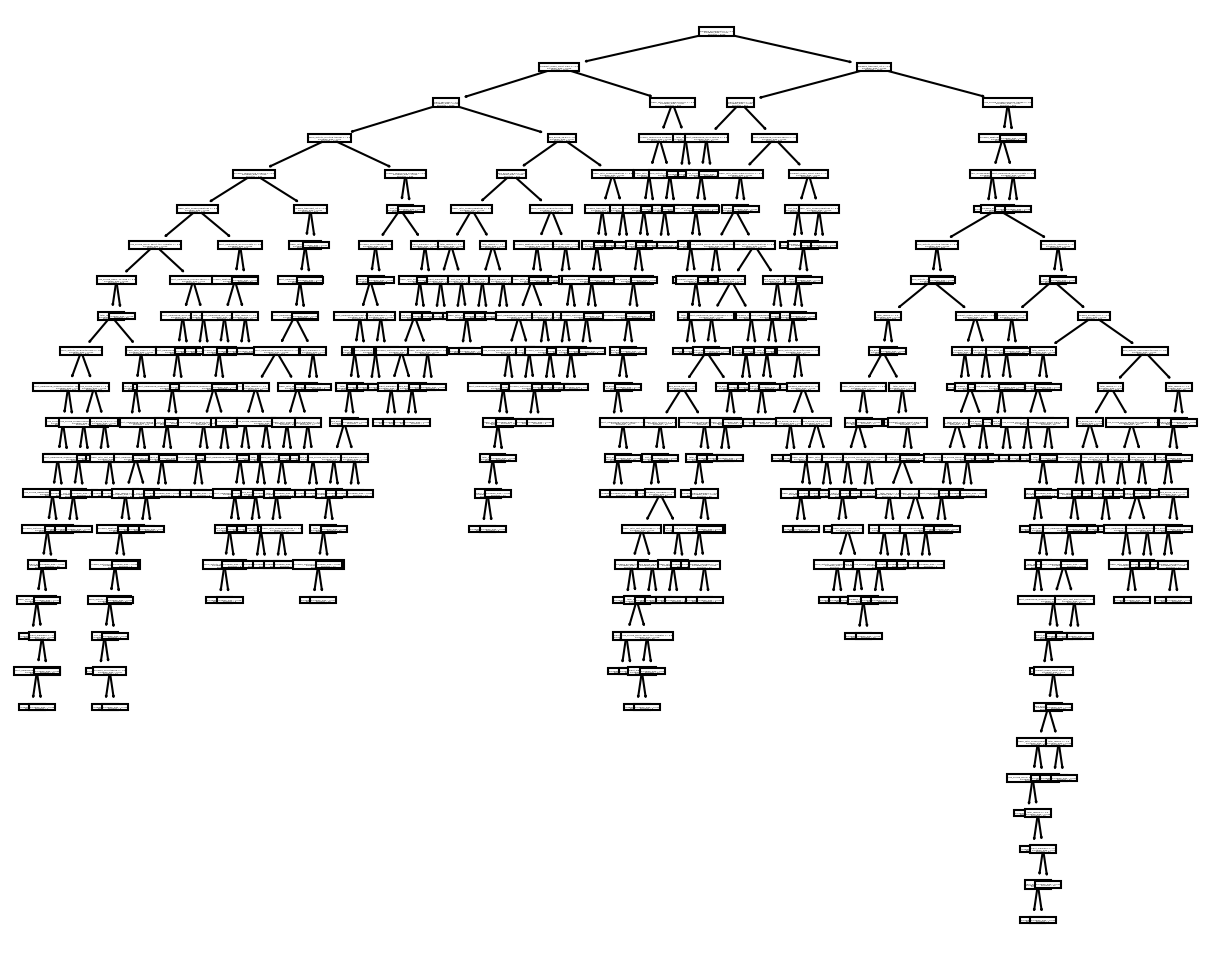

In [67]:



plt.figure(figsize=(10,8), dpi=150)
plot_tree(rf2, feature_names=X.columns);